In [15]:
import pandas as pd
import numpy as np
from scipy.optimize import dual_annealing
from openpyxl import load_workbook

In [16]:
# Function to import the data from the Excel file
def load_datasets(filename='benchmark_target.xlsx'):
    df_benchmark = pd.read_excel(filename, sheet_name='Benchmark')
    df_target = pd.read_excel(filename, sheet_name='Target')
    return df_benchmark, df_target

In [17]:
# Function to calculate the necessary metrics for both datasets
def calculate_metrics(df, target_size, weights):
    clients_with_payments = df['LP'].notnull().sum() / len(df)  # % of clients with payments
    total_paid = df['Payments'].sum()  # Total paid
    total_debt = df['Deb'].sum()  # Total debt
    collection_percentage = total_paid / (total_debt + total_paid) if total_debt + total_paid != 0 else 0  # % of collection

    averages = df.mean(skipna=True)  # Calculate averages for all columns, skipping empty cells

    return {
        'Deb': averages['Deb'],
        'GR': averages['GR'],
        'DPD': averages['DPD'],
        'LP': averages['LP'],  # Average of LP column
        'collection': collection_percentage,  # % of collection
        'payments': clients_with_payments  # % of clients with payments
    }

In [18]:
# Objective function to minimize the difference between benchmark and target metrics
def objective_function(x, df_benchmark, df_target, target_metrics, weights):
    selected_indices = [int(i) for i in x]  # Convert row numbers to integers
    sample = df_benchmark.iloc[selected_indices]  # Select rows based on indices

    sample_metrics = calculate_metrics(sample, len(selected_indices), weights)  # Calculate metrics for sample

    # Calculate the weighted percentage difference
    percentage_diff = 0
    for key in weights.keys():
        percentage_diff += weights[key] * abs((sample_metrics[key] - target_metrics[key]) / target_metrics[key]) * 100

    return percentage_diff

In [19]:
# Simulated annealing function to find the best rows
def simulated_annealing_sampling(df_benchmark, df_target, weights, maxiter=500):
    target_metrics = calculate_metrics(df_target, len(df_target), weights)  # Get target metrics
    
    bounds = [(0, len(df_benchmark) - 1) for _ in range(len(df_target))]  # Define the range for row selection
    
    result = dual_annealing(objective_function, bounds, args=(df_benchmark, df_target, target_metrics, weights), maxiter=maxiter)
    
    selected_indices = [int(i) for i in result.x]  # Get the best rows selected
    return selected_indices

In [20]:
# Function to write results to Excel, updated to take both df_benchmark and df_target
def write_results_to_excel(benchmark_df, target_df, selected_indices, filename='benchmark_target.xlsx'):
    with pd.ExcelWriter(filename, mode='a', if_sheet_exists='replace') as writer:
        new_sample_col = f'Sample {len(benchmark_df.columns) - 1}'  # For a new sample column

        # Add a new column for selected rows
        benchmark_df[new_sample_col] = 0
        benchmark_df.loc[selected_indices, new_sample_col] = 1  # Set to 1 for selected rows

        # Write both DataFrames to separate sheets in the same Excel file
        benchmark_df.to_excel(writer, sheet_name='Benchmark', index=False)
        target_df.to_excel(writer, sheet_name='Target', index=False)

        writer.save()

In [21]:
# Main function to run the process
def main():
    df_benchmark, df_target = load_datasets('benchmark_target.xlsx')  # Load datasets from Excel

    # Define the column weights
    weights = {
        'Deb': 0.1,
        'GR': 0.2,
        'DPD': 0.2,
        'LP': 0.2,
        'collection': 0.1,
        'payments': 0.1
    }

    # Perform simulated annealing to find the best rows
    selected_indices = simulated_annealing_sampling(df_benchmark, df_target, weights)

    # Write the results back to the Excel file, adding a new sample column
    write_results_to_excel(df_benchmark, df_target, selected_indices)

# Run the main function
if __name__ == "__main__":
    main()

C:\Users\Gaming PC\AppData\Local\Temp\ipykernel_11012\238021454.py:14: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [22]:
import pandas as pd
import numpy as np
from scipy.optimize import dual_annealing
from openpyxl import load_workbook

# Function to import the data from the Excel file
def load_datasets(filename='benchmark_target.xlsx'):
    df_benchmark = pd.read_excel(filename, sheet_name='Benchmark')
    df_target = pd.read_excel(filename, sheet_name='Target')
    return df_benchmark, df_target

# Function to calculate the necessary metrics for both datasets
def calculate_metrics(df, target_size, weights):
    clients_with_payments = df['LP'].notnull().sum() / len(df)  # % of clients with payments
    total_paid = df['Payments'].sum()  # Total paid
    total_debt = df['Deb'].sum()  # Total debt
    collection_percentage = total_paid / (total_debt + total_paid) if total_debt + total_paid != 0 else 0  # % of collection

    averages = df.mean(skipna=True)  # Calculate averages for all columns, skipping empty cells

    return {
        'Deb': averages['Deb'],
        'GR': averages['GR'],
        'DPD': averages['DPD'],
        'LP': averages['LP'],  # Average of LP column
        'collection': collection_percentage,  # % of collection
        'payments': clients_with_payments  # % of clients with payments
    }

# Objective function to minimize the difference between benchmark and target metrics
def objective_function(x, df_benchmark, df_target, target_metrics, weights):
    selected_indices = [int(i) for i in x]  # Convert row numbers to integers
    sample = df_benchmark.iloc[selected_indices]  # Select rows based on indices
    sample_metrics = calculate_metrics(sample, len(selected_indices), weights)  # Calculate metrics for sample

    # Calculate the weighted percentage difference
    percentage_diff = 0
    for key in weights.keys():
        percentage_diff += weights[key] * abs((sample_metrics[key] - target_metrics[key]) / target_metrics[key]) * 100

    return percentage_diff

# Function to write results to Excel, updated to take both df_benchmark and df_target
def write_results_to_excel(benchmark_df, target_df, selected_indices, filename='benchmark_target.xlsx'):
    with pd.ExcelWriter(filename, mode='a', if_sheet_exists='replace') as writer:
        new_sample_col = f'Sample {len(benchmark_df.columns) - 1}'  # For a new sample column

        # Add a new column for selected rows
        benchmark_df[new_sample_col] = 0
        benchmark_df.loc[selected_indices, new_sample_col] = 1  # Set to 1 for selected rows

        # Write both DataFrames to separate sheets in the same Excel file
        benchmark_df.to_excel(writer, sheet_name='Benchmark', index=False)
        target_df.to_excel(writer, sheet_name='Target', index=False)

# Main function to run the process
def main():
    df_benchmark, df_target = load_datasets('benchmark_target.xlsx')  # Load datasets from Excel

    # Define the column weights
    weights = {
        'Deb': 0.2,
        'GR': 0.2,
        'DPD': 0.2,
        'LP': 0.2,
        'collection': 0.1,
        'payments': 0.1
    }

    # Perform simulated annealing to find the best rows
    selected_indices = simulated_annealing_sampling(df_benchmark, df_target, weights)

    # Calculate metrics for target and best sample
    target_metrics = calculate_metrics(df_target, len(df_target), weights)
    best_sample = df_benchmark.iloc[selected_indices]
    best_sample_metrics = calculate_metrics(best_sample, len(selected_indices), weights)

    # Print descriptions
    print(f"Number of rows in the final sample: {len(selected_indices)}")
    print("Averages for the target sample:")
    for key, value in target_metrics.items():
        print(f"  {key}: {value:.2f}")
    
    print("Averages for the best sample:")
    for key, value in best_sample_metrics.items():
        print(f"  {key}: {value:.2f}")

    print("Percentage differences between the target and best sample:")
    for key in target_metrics.keys():
        diff = abs((best_sample_metrics[key] - target_metrics[key]) / target_metrics[key]) * 100 if target_metrics[key] != 0 else 0
        print(f"  {key}: {diff:.2f}%")

    # Write the results back to the Excel file, adding a new sample column
    write_results_to_excel(df_benchmark, df_target, selected_indices)

# Run the main function
if __name__ == "__main__":
    main()


Number of rows in the final sample: 250
Averages for the target sample:
  Deb: 4702.27
  GR: 2087.87
  DPD: 1653.37
  LP: 1849.63
  collection: 0.24
  payments: 0.81
Averages for the best sample:
  Deb: 4705.78
  GR: 2087.33
  DPD: 1653.64
  LP: 1849.49
  collection: 0.24
  payments: 0.64
Percentage differences between the target and best sample:
  Deb: 0.07%
  GR: 0.03%
  DPD: 0.02%
  LP: 0.01%
  collection: 0.39%
  payments: 20.79%


 The best solution found:                                                                           
 [296. 839. 597.  32. 974. 739. 319. 683. 621. 317. 671. 127. 976. 275.
 330. 263.  63. 332.  84.  12. 151. 317. 217. 801. 101. 683. 324. 893.
 324. 939. 225. 588. 831. 975. 451. 218. 595. 555. 702.  32. 649. 921.
 927.  12. 363. 937. 316. 185. 768. 775. 782. 661. 630. 570. 997. 497.
 677.  60. 884. 564. 140. 804.  79. 417. 254. 174. 616. 773. 182. 703.
 391. 788. 345. 733. 328. 359. 994. 352. 370. 304. 447. 281.  57. 472.
 845. 368. 714.  84. 325. 969. 275. 738. 319. 687.  27.   9. 777. 743.
 811. 701. 362.  20. 315. 434. 514. 988. 795. 433. 857. 411. 257. 529.
 696. 244. 662. 624. 856. 320. 275.  60. 700. 193. 380. 662. 678. 877.
 992. 841. 767. 167. 638. 233. 217. 316. 634. 988.  51. 307. 949. 191.
 328. 318. 264. 154. 809. 911. 756. 605. 289. 247. 916. 515. 638. 497.
 888. 142. 746. 497. 668. 341. 926. 969. 419. 736. 893. 555. 721. 486.
 229. 938. 660. 138. 701. 503.  67. 471. 204. 

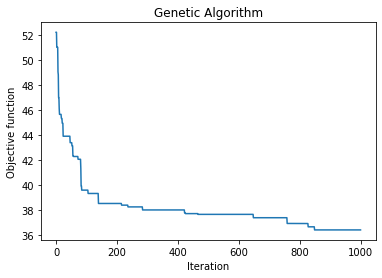

IDs of the final selected rows: [297, 840, 598, 33, 975, 740, 320, 684, 622, 318, 672, 128, 977, 276, 331, 264, 64, 333, 85, 13, 152, 318, 218, 802, 102, 684, 325, 894, 325, 940, 226, 589, 832, 976, 452, 219, 596, 556, 703, 33, 650, 922, 928, 13, 364, 938, 317, 186, 769, 776, 783, 662, 631, 571, 998, 498, 678, 61, 885, 565, 141, 805, 80, 418, 255, 175, 617, 774, 183, 704, 392, 789, 346, 734, 329, 360, 995, 353, 371, 305, 448, 282, 58, 473, 846, 369, 715, 85, 326, 970, 276, 739, 320, 688, 28, 10, 778, 744, 812, 702, 363, 21, 316, 435, 515, 989, 796, 434, 858, 412, 258, 530, 697, 245, 663, 625, 857, 321, 276, 61, 701, 194, 381, 663, 679, 878, 993, 842, 768, 168, 639, 234, 218, 317, 635, 989, 52, 308, 950, 192, 329, 319, 265, 155, 810, 912, 757, 606, 290, 248, 917, 516, 639, 498, 889, 143, 747, 498, 669, 342, 927, 970, 420, 737, 894, 556, 722, 487, 230, 939, 661, 139, 702, 504, 68, 472, 205, 269, 25, 318, 391, 713, 921, 591, 518, 344, 9, 60, 527, 739, 660, 936, 742, 923, 270, 982, 212, 13

C:\Users\Gaming PC\AppData\Local\Temp\ipykernel_11012\3391585263.py:77: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [48]:
import pandas as pd
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
from openpyxl import load_workbook

# Function to import the data from the Excel file
def load_datasets(filename='benchmark_target.xlsx'):
    df_benchmark = pd.read_excel(filename, sheet_name='Benchmark')
    df_target = pd.read_excel(filename, sheet_name='Target')
    return df_benchmark, df_target

# Function to calculate the necessary metrics for both datasets
def calculate_metrics(df, target_size, weights):
    clients_with_payments = df['LP'].notnull().sum() / len(df)  # % of clients with payments
    total_paid = df['Payments'].sum()  # Total paid
    total_debt = df['Deb'].sum()  # Total debt
    collection_percentage = total_paid / (total_debt + total_paid) if total_debt + total_paid != 0 else 0  # % of collection

    averages = df.mean(skipna=True)  # Calculate averages for all columns, skipping empty cells

    return {
        'Deb': averages['Deb'],
        'GR': averages['GR'],
        'DPD': averages['DPD'],
        'LP': averages['LP'],  # Average of LP column
        'collection': collection_percentage,  # % of collection
        'payments': clients_with_payments  # % of clients with payments
    }

# Objective function to minimize the difference between benchmark and target metrics
def objective_function(x, df_benchmark, target_metrics, weights):
    selected_indices = [int(i) for i in x]  # Convert row numbers to integers
    sample = df_benchmark.iloc[selected_indices]  # Select rows based on indices

    sample_metrics = calculate_metrics(sample, len(selected_indices), weights)  # Calculate metrics for sample

    # Calculate the weighted percentage difference
    percentage_diff = 0
    for key in weights.keys():
        percentage_diff += weights[key] * abs((sample_metrics[key] - target_metrics[key]) / target_metrics[key]) * 100

    return percentage_diff

# Genetic algorithm function to find the best rows
def genetic_algorithm_sampling(df_benchmark, df_target, weights, target_size=300):
    target_metrics = calculate_metrics(df_target, len(df_target), weights)  # Get target metrics

    def fitness_function(x):
        return objective_function(x, df_benchmark, target_metrics, weights)

    # Define the genetic algorithm
    varbound = np.array([[0, len(df_benchmark) - 1]] * target_size)
    algorithm_param = {'max_num_iteration': 1000, 'population_size': 100, 'mutation_probability': 0.1, 
                       'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 
                       'crossover_type': 'uniform', 'max_iteration_without_improv': None}

    model = ga(function=fitness_function, dimension=target_size, variable_type='int', variable_boundaries=varbound, 
               algorithm_parameters=algorithm_param)
    model.run()

    selected_indices = model.output_dict['variable']
    return [int(i) for i in selected_indices]

# Function to write results to Excel, updated to take both df_benchmark and df_target
def write_results_to_excel(benchmark_df, target_df, selected_indices, filename='benchmark_target.xlsx'):
    with pd.ExcelWriter(filename, mode='a', if_sheet_exists='replace') as writer:
        new_sample_col = f'Sample {len(benchmark_df.columns) - 1}'  # For a new sample column

        # Add a new column for selected rows
        benchmark_df[new_sample_col] = 0
        benchmark_df.loc[selected_indices, new_sample_col] = 1  # Set to 1 for selected rows

        # Write both DataFrames to separate sheets in the same Excel file
        benchmark_df.to_excel(writer, sheet_name='Benchmark', index=False)
        target_df.to_excel(writer, sheet_name='Target', index=False)

        writer.save()

# Main function to run the process
def main():
    df_benchmark, df_target = load_datasets('benchmark_target.xlsx')  # Load datasets from Excel

    # Define the column weights
    weights = {
        'Deb': 0.1,
        'GR': 0.2,
        'DPD': 0.2,
        'LP': 0.2,
        'collection': 0.1,
        'payments': 0.1
    }

    # Perform genetic algorithm to find the best rows
    selected_indices = genetic_algorithm_sampling(df_benchmark, df_target, weights)

    # Print the IDs of the selected rows, total count, and unique count
    selected_ids = df_benchmark.iloc[selected_indices]['ID'].tolist()
    print("IDs of the final selected rows:", selected_ids)
    print("Count of selected rows:", len(selected_ids))
    print("Count of unique IDs:", len(set(selected_ids)))

    # Write the results back to the Excel file, adding a new sample column
    write_results_to_excel(df_benchmark, df_target, selected_indices)

# Run the main function
if __name__ == "__main__":
    main()


In [50]:
import pandas as pd
import numpy as np
from openpyxl import load_workbook

# Function to import the data from the Excel file
def load_datasets(filename='benchmark_target.xlsx'):
    df_benchmark = pd.read_excel(filename, sheet_name='Benchmark')
    df_target = pd.read_excel(filename, sheet_name='Target')
    return df_benchmark, df_target

# Function to calculate the necessary metrics for a given sample
def calculate_metrics(df, weights):
    clients_with_payments = df['LP'].notnull().sum() / len(df)  # % of clients with payments
    total_paid = df['Payments'].sum()  # Total paid
    total_debt = df['Deb'].sum()  # Total debt
    collection_percentage = total_paid / (total_debt + total_paid) if total_debt + total_paid != 0 else 0  # % of collection

    averages = df.mean(skipna=True)  # Calculate averages for all columns, skipping empty cells

    return {
        'Deb': averages['Deb'],
        'GR': averages['GR'],
        'DPD': averages['DPD'],
        'LP': averages['LP'],  # Average of LP column
        'collection': collection_percentage,  # % of collection
        'payments': clients_with_payments  # % of clients with payments
    }

# Greedy algorithm to select unique rows
def greedy_sampling(df_benchmark, target_metrics, weights, target_size):
    selected_indices = []
    available_indices = set(df_benchmark.index)  # Use a set to track available indices

    while len(selected_indices) < target_size:
        best_index = None
        min_difference = float('inf')

        for index in available_indices:
            temp_indices = selected_indices + [index]
            sample = df_benchmark.iloc[temp_indices]
            sample_metrics = calculate_metrics(sample, weights)

            # Calculate the weighted percentage difference
            percentage_diff = 0
            for key in weights.keys():
                percentage_diff += weights[key] * abs((sample_metrics[key] - target_metrics[key]) / target_metrics[key]) * 100

            if percentage_diff < min_difference:
                min_difference = percentage_diff
                best_index = index

        if best_index is not None:
            selected_indices.append(best_index)
            available_indices.remove(best_index)  # Remove the index to enforce uniqueness

    return selected_indices

# Function to write results to Excel
def write_results_to_excel(benchmark_df, target_df, selected_indices, filename='benchmark_target.xlsx'):
    with pd.ExcelWriter(filename, mode='a', if_sheet_exists='replace') as writer:
        new_sample_col = f'Sample {len(benchmark_df.columns) - 1}'  # For a new sample column

        # Add a new column for selected rows
        benchmark_df[new_sample_col] = 0
        benchmark_df.loc[selected_indices, new_sample_col] = 1  # Set to 1 for selected rows

        # Write both DataFrames to separate sheets in the same Excel file
        benchmark_df.to_excel(writer, sheet_name='Benchmark', index=False)
        target_df.to_excel(writer, sheet_name='Target', index=False)

# Main function to run the process
def main():
    df_benchmark, df_target = load_datasets('benchmark_target.xlsx')  # Load datasets from Excel

    # Define the column weights
    weights = {
        'Deb': 0.1,
        'GR': 0.2,
        'DPD': 0.2,
        'LP': 0.2,
        'collection': 0.1,
        'payments': 0.1
    }

    # Calculate target metrics
    target_metrics = calculate_metrics(df_target, weights)

    # Perform greedy sampling to find the best rows
    selected_indices = greedy_sampling(df_benchmark, target_metrics, weights, target_size=300)

    # Print the IDs of the final selected rows, count of selected rows, and count of unique IDs
    print("IDs of the final selected rows:", selected_indices)
    print("Count of selected rows:", len(selected_indices))
    print("Count of unique IDs:", len(set(selected_indices)))

    # Write the results back to the Excel file, adding a new sample column
    write_results_to_excel(df_benchmark, df_target, selected_indices)

# Run the main function
if __name__ == "__main__":
    main()


IDs of the final selected rows: [976, 309, 920, 727, 960, 969, 733, 9, 890, 265, 710, 368, 495, 693, 935, 528, 966, 881, 338, 626, 276, 895, 916, 225, 318, 743, 202, 932, 120, 323, 888, 328, 145, 289, 315, 3, 192, 700, 94, 563, 362, 228, 376, 874, 844, 197, 370, 60, 286, 998, 188, 939, 515, 544, 340, 746, 307, 356, 891, 548, 759, 12, 345, 314, 559, 736, 797, 696, 990, 162, 398, 280, 30, 549, 701, 892, 884, 872, 343, 649, 911, 812, 859, 876, 703, 297, 380, 281, 330, 271, 887, 543, 173, 555, 360, 325, 324, 183, 226, 374, 89, 27, 997, 855, 540, 166, 339, 893, 6, 670, 940, 317, 575, 589, 514, 864, 777, 794, 953, 964, 931, 411, 233, 758, 247, 275, 36, 506, 749, 680, 176, 517, 723, 186, 675, 78, 941, 341, 212, 70, 218, 726, 630, 827, 586, 802, 839, 793, 167, 731, 787, 653, 745, 298, 57, 65, 294, 267, 918, 143, 41, 124, 44, 748, 178, 824, 847, 803, 77, 833, 641, 52, 593, 988, 569, 131, 209, 125, 312, 986, 358, 557, 490, 503, 134, 708, 995, 288, 572, 435, 568, 755, 165, 84, 137, 678, 217, 677,

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from openpyxl import load_workbook

# Function to import the data from the Excel file
def load_datasets(filename='benchmark_target.xlsx'):
    df_benchmark = pd.read_excel(filename, sheet_name='Benchmark')
    df_target = pd.read_excel(filename, sheet_name='Target')
    return df_benchmark, df_target

# Function to calculate the necessary metrics for both datasets
def calculate_metrics(df, weights):
    clients_with_payments = df['LP'].notnull().sum() / len(df)  # % of clients with payments
    total_paid = df['Payments'].sum()  # Total paid
    total_debt = df['Deb'].sum()  # Total debt
    collection_percentage = total_paid / (total_debt + total_paid) if total_debt + total_paid != 0 else 0  # % of collection

    averages = df.mean(skipna=True)  # Calculate averages for all columns, skipping empty cells

    return {
        'Deb': averages['Deb'],
        'GR': averages['GR'],
        'DPD': averages['DPD'],
        'LP': averages['LP'],  # Average of LP column
        'collection': collection_percentage,  # % of collection
        'payments': clients_with_payments  # % of clients with payments
    }

# Greedy Sampling algorithm with visualizations
def greedy_sampling(df_benchmark, df_target, weights):
    target_metrics = calculate_metrics(df_target, weights)
    available_indices = set(range(len(df_benchmark)))
    selected_indices = []
    percentage_diffs = []
    
    start_time = time.time()

    while len(selected_indices) < 300 and available_indices:
        best_index = None
        best_diff = float('inf')

        for index in available_indices:
            sample_indices = selected_indices + [index]
            sample = df_benchmark.iloc[sample_indices]
            sample_metrics = calculate_metrics(sample, weights)
            
            # Calculate the weighted percentage difference
            percentage_diff = 0
            for key in weights:
                if target_metrics[key] != 0:
                    percentage_diff += weights[key] * abs((sample_metrics[key] - target_metrics[key]) / target_metrics[key]) * 100

            if percentage_diff < best_diff:
                best_diff = percentage_diff
                best_index = index

        if best_index is not None:
            selected_indices.append(best_index)
            available_indices.remove(best_index)
            percentage_diffs.append(best_diff)

    end_time = time.time()
    elapsed_time = end_time - start_time

    # Plotting the percentage difference over iterations
    plt.figure(figsize=(10, 5))
    plt.plot(percentage_diffs, marker='o')
    plt.title('Percentage Difference Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('% Difference')
    plt.grid(True)
    plt.show()

    # Print the elapsed time
    print(f"Time taken by the algorithm: {elapsed_time:.2f} seconds")
    
    # Print final results
    print(f"Selected Row IDs: {selected_indices}")
    print(f"Count of Selected Rows: {len(selected_indices)}")
    print(f"Count of Unique IDs: {len(set(selected_indices))}")

    return selected_indices

# Function to write results to Excel, updated to take both df_benchmark and df_target
def write_results_to_excel(benchmark_df, target_df, selected_indices, filename='benchmark_target.xlsx'):
    with pd.ExcelWriter(filename, mode='a', if_sheet_exists='replace') as writer:
        new_sample_col = f'Sample {len(benchmark_df.columns) - 1}'  # For a new sample column

        # Add a new column for selected rows
        benchmark_df[new_sample_col] = 0
        benchmark_df.loc[selected_indices, new_sample_col] = 1  # Set to 1 for selected rows

        # Write both DataFrames to separate sheets in the same Excel file
        benchmark_df.to_excel(writer, sheet_name='Benchmark', index=False)
        target_df.to_excel(writer, sheet_name='Target', index=False)

        writer.save()

# Main function to run the process
def main():
    df_benchmark, df_target = load_datasets('benchmark_target.xlsx')  # Load datasets from Excel

    # Define the column weights
    weights = {
        'Deb': 0.1,
        'GR': 0.2,
        'DPD': 0.2,
        'LP': 0.2,
        'collection': 0.1,
        'payments': 0.1
    }

    # Perform greedy sampling to find the best rows
    selected_indices = greedy_sampling(df_benchmark, df_target, weights)

    # Write the results back to the Excel file, adding a new sample column
    write_results_to_excel(df_benchmark, df_target, selected_indices)

# Run the main function
if __name__ == "__main__":
    main()
